# Pandas Review Part IV

## Pivot Tables

### Motivating Pivot Tables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic = sns.load_dataset('titanic')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Pivot Tables by Hand

In [3]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [4]:
titanic.groupby(['sex', 'class'])['survived'].agg('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

In [5]:
titanic.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### Pivot Table Syntax

In [6]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [7]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [8]:
titanic['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [9]:
pd.cut(titanic['age'], np.linspace(titanic['age'].min(), titanic['age'].max(), 5))

0      (20.315, 40.21]
1      (20.315, 40.21]
2      (20.315, 40.21]
3      (20.315, 40.21]
4      (20.315, 40.21]
            ...       
886    (20.315, 40.21]
887     (0.42, 20.315]
888                NaN
889    (20.315, 40.21]
890    (20.315, 40.21]
Name: age, Length: 891, dtype: category
Categories (4, interval[float64]): [(0.42, 20.315] < (20.315, 40.21] < (40.21, 60.105] <
                                    (60.105, 80.0]]

In [10]:
titanic['fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: fare, dtype: float64

In [11]:
fare = pd.qcut(titanic['fare'], 2)
fare.head()

0     (-0.001, 14.454]
1    (14.454, 512.329]
2     (-0.001, 14.454]
3    (14.454, 512.329]
4     (-0.001, 14.454]
Name: fare, dtype: category
Categories (2, interval[float64]): [(-0.001, 14.454] < (14.454, 512.329]]

In [12]:
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]            ... (14.454, 512.329]          
class                      First    Second  ...            Second     Third
sex    age                                  ...                            
female (0, 18]               NaN  1.000000  ...          1.000000  0.318182
       (18, 80]              NaN  0.880000  ...          0.914286  0.391304
male   (0, 18]               NaN  0.000000  ...          0.818182  0.178571
       (18, 80]              0.0  0.098039  ...          0.030303  0.192308

[4 rows x 6 columns]

### Example: Birthrate Data

In [13]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   659k      0 --:--:-- --:--:-- --:--:--  657k


In [14]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [0]:
births['decade'] = 10 * (births['year'] // 10)

In [16]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

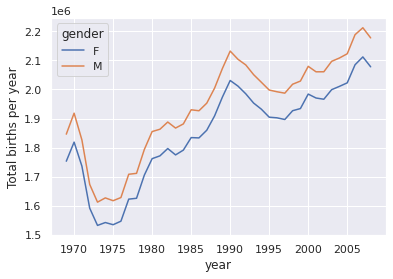

In [18]:
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('Total births per year');

---

## Vectorized String Operations

In [19]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [20]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [0]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']

In [22]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [23]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [0]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',                          
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [25]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [26]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [27]:
monte.str.upper()

0    GRAHAM CHAPMAN
1       JOHN CLEESE
2     TERRY GILLIAM
3         ERIC IDLE
4       TERRY JONES
5     MICHAEL PALIN
dtype: object

In [28]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [29]:
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [30]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [31]:
monte.str[:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [32]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [33]:
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [34]:
full_monte = pd.DataFrame({'name': monte,                           
                           'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C',                           
                                    'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [35]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


### Example: Recipte Database

In [36]:
!curl -O http://openrecipes.s3.amazonaws.com/recipeitems-latest.json.gz 
!gunzip recipeitems-latest.json.gz 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    20  100    20    0     0     88      0 --:--:-- --:--:-- --:--:--    88
gzip: recipeitems-latest.json already exists; do you wish to overwrite (y or n)? y


In [37]:
try:
    recipes = pd.read_json('recipeitems-latest.json')
except ValueError as e:
    print('ValueError: ', e)

ValueError:  Expected object or value
